# COVID-19

Scripts inspired from https://towardsdatascience.com/say-goodbye-to-excel-a-simple-evaluation-of-python-grid-studio-using-covid-19-data-90624f322b81

Data is coming from https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
    

In [2]:
import pandas as pd
# Read all data
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").dropna()
print(df.head())

df


      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  19/04/2020   19      4  2020     63       0             Afghanistan    AF   
1  18/04/2020   18      4  2020     51       1             Afghanistan    AF   
2  17/04/2020   17      4  2020     10       4             Afghanistan    AF   
3  16/04/2020   16      4  2020     70       2             Afghanistan    AF   
4  15/04/2020   15      4  2020     49       2             Afghanistan    AF   

  countryterritoryCode  popData2018  
0                  AFG   37172386.0  
1                  AFG   37172386.0  
2                  AFG   37172386.0  
3                  AFG   37172386.0  
4                  AFG   37172386.0  


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,19/04/2020,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0
1,18/04/2020,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0
2,17/04/2020,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0
3,16/04/2020,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
4,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
11763,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
11764,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
11765,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
11766,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [3]:
# Get French data
df_fr = df[df.countriesAndTerritories == 'France']

# Retain only date, cases and deaths columns
df_fr = df_fr[['dateRep', 'cases', 'deaths']]

df_fr

,dateRep,cases,deaths
3868,19/04/2020,2569,642
3869,18/04/2020,405,761
3870,17/04/2020,2641,753
3871,16/04/2020,2633,1438
3872,15/04/2020,5497,762
...,...,...,...
3974,04/01/2020,0,0
3975,03/01/2020,0,0
3976,02/01/2020,0,0
3977,01/01/2020,0,0


In [6]:
# Calculate cumulative cases & deaths
df_fr = df_fr.sort_values('dateRep')
df_fr['cumCases'] = df_fr.cases.cumsum()
df_fr['cumDeaths'] = df_fr.deaths.cumsum()

df_fr

,dateRep,cases,deaths,cumCases,cumDeaths
3977,01/01/2020,0,0,0,0
3946,01/02/2020,0,0,0,0
3917,01/03/2020,43,0,43,0
3886,01/04/2020,7578,499,7621,499
3976,02/01/2020,0,0,7621,499
...,...,...,...,...,...
3948,30/01/2020,1,0,104845,18613
3888,30/03/2020,2599,292,107444,18905
3947,31/01/2020,1,0,107445,18905
3887,31/03/2020,4376,418,111821,19323


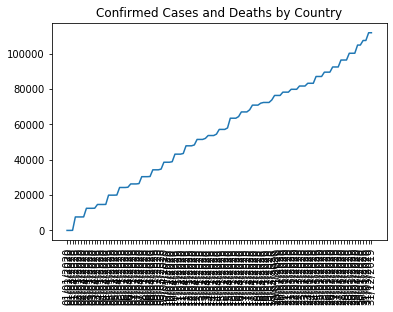

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df_fr.dateRep,df_fr.cumCases)


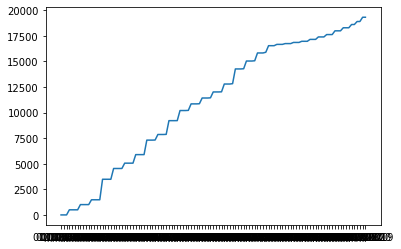

In [11]:
plt.plot(df_fr.dateRep, df_fr.cumDeaths)

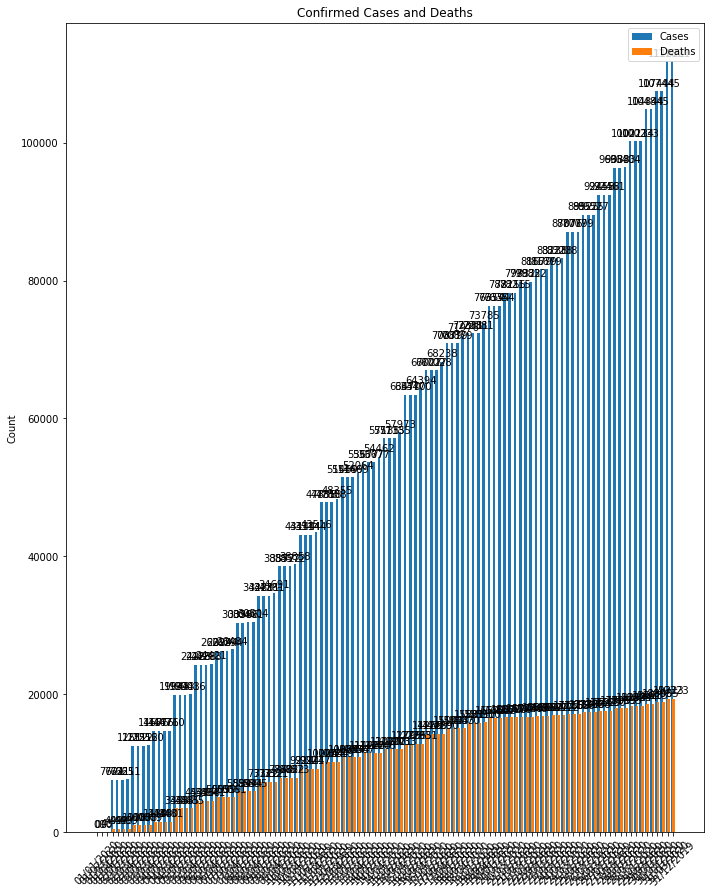

In [12]:
import numpy as np

x = np.arange(len(df_fr.dateRep))  # the label are dates
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,12))
rects1 = ax.bar(x - width/3, df_fr.cumCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df_fr.cumDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(df_fr.dateRep)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()